In [ ]:
"""
The aim of this project is to perform some hypothesis testing on a dataset containing heart disease data collected in Cleveland
in 1988. The data were taken from the UCI Machine Learning Repository. 

In this project the Cleveland - data of 303 probands were downloaded and cleaned for hypothesis testing. Then the actual
hypothesis testing was performed. The test used were the t-test, the ANOVA and Tukey test and finally the Chi2 - test.
"""

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
"""
To gain some insight of the downloaded data some explanatory informations from UCI were copied to this file:

Attribute Information:

Only 14 attributes used:
1. #3 (age)
2. #4 (sex)
3. #9 (cp)
4. #10 (trestbps)
5. #12 (chol)
6. #16 (fbs)
7. #19 (restecg)
8. #32 (thalach)
9. #38 (exang)
10. #40 (oldpeak)
11. #41 (slope)
12. #44 (ca)
13. #51 (thal)
14. #58 (num) (the predicted attribute)

Complete attribute documentation:
1 id: patient identification number
2 ccf: social security number (I replaced this with a dummy value of 0)
3 age: age in years
4 sex: sex (1 = male; 0 = female)
5 painloc: chest pain location (1 = substernal; 0 = otherwise)
6 painexer (1 = provoked by exertion; 0 = otherwise)
7 relrest (1 = relieved after rest; 0 = otherwise)
8 pncaden (sum of 5, 6, and 7)
9 cp: chest pain type
-- Value 1: typical angina
-- Value 2: atypical angina
-- Value 3: non-anginal pain
-- Value 4: asymptomatic
10 trestbps: resting blood pressure (in mm Hg on admission to the hospital)
11 htn
12 chol: serum cholestoral in mg/dl
13 smoke: I believe this is 1 = yes; 0 = no (is or is not a smoker)
14 cigs (cigarettes per day)
15 years (number of years as a smoker)
16 fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
17 dm (1 = history of diabetes; 0 = no such history)
18 famhist: family history of coronary artery disease (1 = yes; 0 = no)
19 restecg: resting electrocardiographic results
-- Value 0: normal
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
20 ekgmo (month of exercise ECG reading)
21 ekgday(day of exercise ECG reading)
22 ekgyr (year of exercise ECG reading)
23 dig (digitalis used furing exercise ECG: 1 = yes; 0 = no)
24 prop (Beta blocker used during exercise ECG: 1 = yes; 0 = no)
25 nitr (nitrates used during exercise ECG: 1 = yes; 0 = no)
26 pro (calcium channel blocker used during exercise ECG: 1 = yes; 0 = no)
27 diuretic (diuretic used used during exercise ECG: 1 = yes; 0 = no)
28 proto: exercise protocol
1 = Bruce
2 = Kottus
3 = McHenry
4 = fast Balke
5 = Balke
6 = Noughton
7 = bike 150 kpa min/min (Not sure if "kpa min/min" is what was written!)
8 = bike 125 kpa min/min
9 = bike 100 kpa min/min
10 = bike 75 kpa min/min
11 = bike 50 kpa min/min
12 = arm ergometer
29 thaldur: duration of exercise test in minutes
30 thaltime: time when ST measure depression was noted
31 met: mets achieved
32 thalach: maximum heart rate achieved
33 thalrest: resting heart rate
34 tpeakbps: peak exercise blood pressure (first of 2 parts)
35 tpeakbpd: peak exercise blood pressure (second of 2 parts)
36 dummy
37 trestbpd: resting blood pressure
38 exang: exercise induced angina (1 = yes; 0 = no)
39 xhypo: (1 = yes; 0 = no)
40 oldpeak = ST depression induced by exercise relative to rest
41 slope: the slope of the peak exercise ST segment
-- Value 1: upsloping
-- Value 2: flat
-- Value 3: downsloping
42 rldv5: height at rest
43 rldv5e: height at peak exercise
44 ca: number of major vessels (0-3) colored by flourosopy
45 restckm: irrelevant
46 exerckm: irrelevant
47 restef: rest raidonuclid (sp?) ejection fraction
48 restwm: rest wall (sp?) motion abnormality
0 = none
1 = mild or moderate
2 = moderate or severe
3 = akinesis or dyskmem (sp?)
49 exeref: exercise radinalid (sp?) ejection fraction
50 exerwm: exercise wall (sp?) motion
51 thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
52 thalsev: not used
53 thalpul: not used
54 earlobe: not used
55 cmo: month of cardiac cath (sp?) (perhaps "call")
56 cday: day of cardiac cath (sp?)
57 cyr: year of cardiac cath (sp?)
58 num: diagnosis of heart disease (angiographic disease status)
-- Value 0: < 50% diameter narrowing
-- Value 1: > 50% diameter narrowing
(in any major vessel: attributes 59 through 68 are vessels)
59 lmt
60 ladprox
61 laddist
62 diag
63 cxmain
64 ramus
65 om1
66 om2
67 rcaprox
68 rcadist
69 lvx1: not used
70 lvx2: not used
71 lvx3: not used
72 lvx4: not used
73 lvf: not used
74 cathef: not used
75 junk: not used
76 name: last name of patient (I replaced this with the dummy string "name")

num = The "goal" field refers to the presence of heart disease in the patient.
    It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting 
    to distinguish presence (values 1,2,3,4) from absence (value 0).
"""

'\nAttribute Information:\n\nOnly 14 attributes used:\n1. #3 (age)\n2. #4 (sex)\n3. #9 (cp)\n4. #10 (trestbps)\n5. #12 (chol)\n6. #16 (fbs)\n7. #19 (restecg)\n8. #32 (thalach)\n9. #38 (exang)\n10. #40 (oldpeak)\n11. #41 (slope)\n12. #44 (ca)\n13. #51 (thal)\n14. #58 (num) (the predicted attribute)\n\nComplete attribute documentation:\n1 id: patient identification number\n2 ccf: social security number (I replaced this with a dummy value of 0)\n3 age: age in years\n4 sex: sex (1 = male; 0 = female)\n5 painloc: chest pain location (1 = substernal; 0 = otherwise)\n6 painexer (1 = provoked by exertion; 0 = otherwise)\n7 relrest (1 = relieved after rest; 0 = otherwise)\n8 pncaden (sum of 5, 6, and 7)\n9 cp: chest pain type\n-- Value 1: typical angina\n-- Value 2: atypical angina\n-- Value 3: non-anginal pain\n-- Value 4: asymptomatic\n10 trestbps: resting blood pressure (in mm Hg on admission to the hospital)\n11 htn\n12 chol: serum cholestoral in mg/dl\n13 smoke: I believe this is 1 = yes; 

In [3]:
# The Cleveland data from UCI are imported and the columns are getting their corresponding names according to the attribute in-
# formations:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data",
                names = ["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","num"])

In [4]:
# Examining the dataframe
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [5]:
# Giving the "num" column a more explanatory name. The num column shows the absence and presence of a heart disease where 0 = no
# heart disease and 1,2,3,4 = some kind of heart disease
df1 = df.rename(columns = {"num":"heart_disease"})

In [6]:
# removing some unnecessary columns for the hypothesis testing:
heart = df1.drop(columns = ["restecg","oldpeak","slope","ca","thal"])

In [7]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,thalach,exang,heart_disease
0,63.0,1.0,1.0,145.0,233.0,1.0,150.0,0.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,108.0,1.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,129.0,1.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,187.0,0.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,172.0,0.0,0


In [8]:
# The later performed hypothesis testing requires some categorical variables. Here the data from the heart_disease column
# are transformed to a categorical vairable (absence/presence) using a lambda function:
heart["heart_disease"] = heart.heart_disease.apply(lambda disease_value: "absence" if disease_value == 0 else "presence")


In [9]:
# Doing the same with the sex column:
heart["sex"] = heart.sex.apply(lambda value: "male" if value == 1 else "female")

In [12]:
# ...and with the cp (chest pain type) column:
heart["cp"] = heart.cp.apply(lambda cp_value: "typical angina" if cp_value == 1 else ("atypical angina" if cp_value == 2 else
                                                                                      ("non-anginal pain" if cp_value == 3
                                                                                       else "asymptomatic")))

In [13]:
"""
Now the "heart" dataframe contains the following variables:

age: age in years
sex: sex assigned at birth; 'male' or 'female'
trestbps: resting blood pressure in mm Hg
chol: serum cholesterol in mg/dl
cp: chest pain type ('typical angina', 'atypical angina', 'non-anginal pain', or 'asymptomatic')
exang: whether the patient experiences exercise-induced angina (1: yes; 0: no)
fbs: whether the patient’s fasting blood sugar is >120 mg/dl (1: yes; 0: no)
thalach: maximum heart rate achieved in exercise test
heart_disease: whether the patient is found to have heart disease ('presence': diagnosed with heart disease; 'absence': no heart disease)
We inspect the first few rows of data using the .head() method.
"""
heart.head()

,age,sex,cp,trestbps,chol,fbs,thalach,exang,heart_disease
0,63.0,male,typical angina,145.0,233.0,1.0,150.0,0.0,absence
1,67.0,male,asymptomatic,160.0,286.0,0.0,108.0,1.0,presence
2,67.0,male,asymptomatic,120.0,229.0,0.0,129.0,1.0,presence
3,37.0,male,non-anginal pain,130.0,250.0,0.0,187.0,0.0,absence
4,41.0,female,atypical angina,130.0,204.0,0.0,172.0,0.0,absence


In [14]:
"""
We might also want to check the dataframe for missing values to make sure that the hypothesis tesing includes all probands data
"""
heart.info()
# There are no missing values in any of the columns since there are 303 values in every column and
#the info table shows 303 non-null - values for all columns. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            303 non-null    float64
 1   sex            303 non-null    object 
 2   cp             303 non-null    object 
 3   trestbps       303 non-null    float64
 4   chol           303 non-null    float64
 5   fbs            303 non-null    float64
 6   thalach        303 non-null    float64
 7   exang          303 non-null    float64
 8   heart_disease  303 non-null    object 
dtypes: float64(6), object(3)
memory usage: 21.4+ KB


<AxesSubplot:xlabel='thalach', ylabel='heart_disease'>

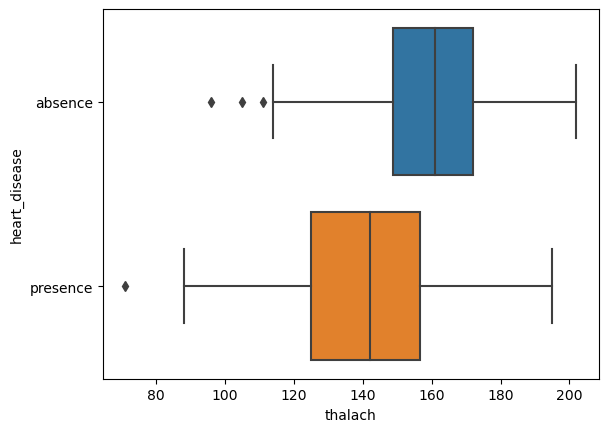

In [17]:
"""
Each of the patients in this dataset underwent an exercise test, during which their heart rate was monitored.
For each patient, thalach gives us the highest heart rate that the patient achieved during this test.

It might be interesting to examine if thalach associated with whether or not a patient will ultimately be diagnosed with heart disease?
Here a poxplot is used to plot side by side box plots of thalach for patients who were and were not diagnosed with 
heart disease.
"""

sns.boxplot(x=heart.thalach, y=heart.heart_disease)

"""
There is a slight difference in max heart rates, where the people without diagnosed heart disease had a slightly higher max rate.
The median of the absence group is about 20 higher and the minimum heart rate more than 20 higher).
From the plots the standard deviation from the presence group may seem a bit higher than from the absence group.
We want to examine this further by calculating mean and median differences and the ratio of the standard deviation. 
"""

In [19]:
thalach_hd = heart.thalach[heart.heart_disease == "presence"]
thalach_no_hd = heart.thalach[heart.heart_disease == "absence"]
print(thalach_hd)
print(thalach_no_hd)

1      108.0
2      129.0
6      160.0
8      147.0
9      155.0
       ...  
297    123.0
298    132.0
299    141.0
300    115.0
301    174.0
Name: thalach, Length: 139, dtype: float64
0      150.0
3      187.0
4      172.0
5      178.0
7      163.0
       ...  
288    163.0
289    169.0
291    166.0
295    182.0
302    173.0
Name: thalach, Length: 164, dtype: float64


In [20]:
mean_thalach_hd = np.mean(thalach_hd)
mean_thalach_no_hd = np.mean(thalach_no_hd)

In [21]:
# Calculating mean and mean differences
print(mean_thalach_hd)
print(mean_thalach_no_hd)
print(mean_thalach_hd-mean_thalach_no_hd)

139.25899280575538
158.3780487804878
-19.11905597473242


In [22]:
# calculating median and median differences
median_hd = np.median(thalach_hd)
print(median_hd)
median_no_hd = np.median(thalach_no_hd)
print(median_no_hd)
print(median_hd - median_no_hd)

# Both the median and mean differences are quite big hinting that there might be an assoication between the variables.

142.0
161.0
-19.0


In [25]:
# Calculation standard deviation and ratio
dev_hd = np.std(thalach_hd)
print(dev_hd)

dev_no_hd = np.std(thalach_no_hd)
print(dev_no_hd)

print(dev_no_hd/dev_hd) # The ratio of the standard deviation is slightly too little (has best to be min 0.9) to make a good
# candidate for hypothesis testing but we'll proceed anyways.

22.511815644009623
19.14045660687256
0.8502404652538909


In [27]:
"""
We’d like to find out if the average thalach of a heart disease patient is significantly different from the average thalach 
for a person without heart disease.

The null and alternative hypotheses:

Null: The average thalach for a person with heart disease is equal to the average thalach for a person without heart disease.
Alternative: The average thalach for a person with heart disease is NOT equal to the average thalach for a person without heart
disease.

Here we run a two sample t-test to test an association between a binary categorical variable (absence/presence) and a quantitative
variable (heart rate)
"""

from scipy.stats import ttest_ind
tstat, pval = ttest_ind(thalach_hd,thalach_no_hd)
print(pval) # p-value = 3.46*10^(-14)

# The p-value is much less than 0.05 so the null-hypothesis is rejected and we can conclude that there is a significant difference
# between the average heart rate of people with and without heart disease (the average heart rate of people without heart disease
# being significantly higher)

3.456964908430172e-14


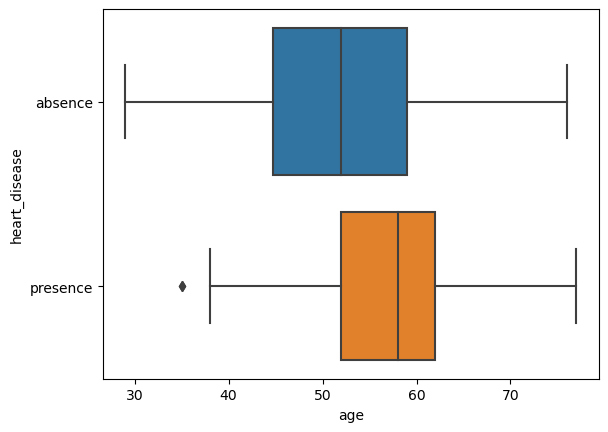

8.955636917529706e-05


In [33]:
"""
Next we check if there is an association between age and heart disease

H0 = the average age for a person with heart disease is equal to the average age for a person with no heart disease
H1 = the average age for a person with heart disease is different from the average age for a person with no heart disease
"""
# Boxplots:
plt.clf()
sns.boxplot(x=heart.age, y=heart.heart_disease)
plt.show()

# The plot highly suggests that the mean (median) age of people without heart disease is significantly lower

# T-test
age_hd = heart.age[heart.heart_disease == "presence"]
age_no_hd = heart.age[heart.heart_disease == "absence"]

tstat, pval = ttest_ind(age_hd,age_no_hd)

print(pval) # = 0.00008956
# The p-value is below 0.05 so there is a significant difference in mean-age of heart disease and no-heart disease people

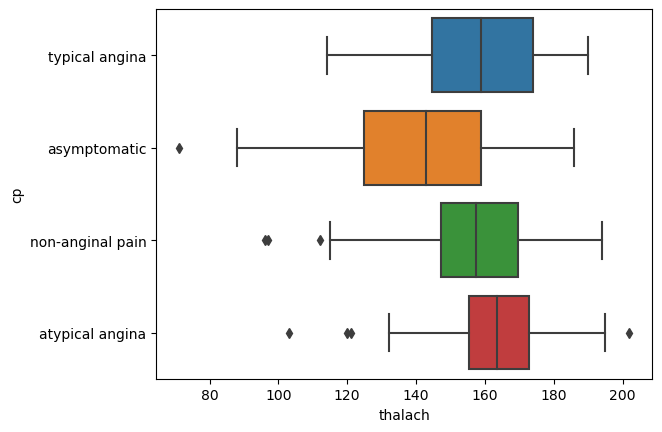

In [35]:
"""
Next, let’s investigate the relationship between thalach (maximum heart rate achieved during exercise) and the type of heart
pain a person experiences. We'll start with boxplots!
"""

plt.clf()
sns.boxplot(x=heart.thalach, y=heart.cp)
plt.show()

"""
The boxplots suggest that at least the average thalach for the asymptomatic chest pain type is significantly lower than the others
"""

In [36]:
"""
To investigate this further, we'll run an ANOVA and Tukey test.
To begin with we save the values of thalach for patients who experienced each type of chest pain as
thalach_typical, thalach_asymptom, thalach_nonangin, and thalach_atypical, respectively.
"""

thalach_typical = heart.thalach[heart.cp == "typical angina"]
thalach_asymptom = heart.thalach[heart.cp == "asymptomatic"]
thalach_nonangin = heart.thalach[heart.cp == "non-anginal pain"]
thalach_atypical = heart.thalach[heart.cp == "atypical angina"]

In [40]:
"""
Performing ANOVA and Tukey hypothesis tests to address the following null and alternative hypotheses:

Null: People with typical angina, non-anginal pain, atypical angina, and asymptomatic people all have the same average thalach.
Alternative: People with typical angina, non-anginal pain, atypical angina, and asymptomatic people do not all have the same
average thalach.

Here we use the ANOVA + Tukey test since we want to compare a non-binary categorical variable (chest pain type) with a quantita-
tive variable (thalach)
"""
# ANOVA:
from scipy.stats import f_oneway
fstat, pval = f_oneway(thalach_typical,thalach_asymptom,thalach_nonangin,thalach_atypical)

print(pval) # p-value = 0.000000000191

# The p-value suggests that there is at least one categorical variable with a significant different mean thalach from 
# one of the others

# Tukey:

from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey_results = pairwise_tukeyhsd(heart.thalach, heart.cp, 0.05)
print(tukey_results)
# The table shows that the null hypothesis should be rejected for the asymptomatic chest pain variable.


1.9065505247705008e-10
           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
     group1           group2      meandiff p-adj   lower    upper  reject
-------------------------------------------------------------------------
    asymptomatic  atypical angina  21.7394    0.0  12.7442 30.7347   True
    asymptomatic non-anginal pain  14.7264    0.0   7.2583 22.1945   True
    asymptomatic   typical angina   15.276 0.0081   2.9707 27.5812   True
 atypical angina non-anginal pain   -7.013 0.2481 -16.7587  2.7327  False
 atypical angina   typical angina  -6.4635 0.6213 -20.2702  7.3432  False
non-anginal pain   typical angina   0.5495 0.9995 -12.3145 13.4136  False
-------------------------------------------------------------------------


In [41]:
"""
Finally, let’s investigate the relationship between the kind of chest pain a person experiences and whether or not they have
heart disease. We create a contingency table of cp and heart_disease.
"""

Xtab = pd.crosstab(heart.cp, heart.heart_disease)
print(Xtab)
# The table suggests that people with a heart disease more often have an asymptomatic chest pain.

heart_disease     absence  presence
cp                                 
asymptomatic           39       105
atypical angina        41         9
non-anginal pain       68        18
typical angina         16         7


In [43]:
# We are checking the association with an chi2-test in order to compare two categorical variables (chest pain type/ heart disease)

from scipy.stats import chi2_contingency

chi2, pval, dof, expected = chi2_contingency(Xtab)
print(pval) # p-value = 0.0000000000000000125 so there is a significant association between the chest pain type and the absence/
# presence of heart disease

1.2517106007837527e-17
